In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
atp_2022 = pd.read_csv('/content/drive/MyDrive/Datasets/SURFS Tennis/ATP 2022.txt')
atp_2022.insert(0, 'year', '2022', True)

atp_2021 = pd.read_csv('/content/drive/MyDrive/Datasets/SURFS Tennis/ATP 2021.txt')
atp_2021.insert(0, 'year', '2021', True)

atp_2020 = pd.read_csv('/content/drive/MyDrive/Datasets/SURFS Tennis/ATP 2020.txt')
atp_2020.insert(0, 'year', '2020', True)

atp_2019 = pd.read_csv('/content/drive/MyDrive/Datasets/SURFS Tennis/ATP 2019.txt')
atp_2019.insert(0, 'year', '2019', True)

atp_2018 = pd.read_csv('/content/drive/MyDrive/Datasets/SURFS Tennis/ATP 2018.txt')
atp_2018.insert(0, 'year', '2018', True)

In [ ]:
atp = pd.concat([atp_2022, atp_2021, atp_2020, atp_2019, atp_2018], axis=0, ignore_index=True)

In [ ]:
right_w_c = '#FF8119'
right_l_c = '#FFD0A5'

left_w_c = '#1997FF'
left_l_c = '#A9D8FF'

In [ ]:
atp = atp.drop(['tourney_id','winner_id','winner_entry','winner_ht','winner_ioc','loser_id','loser_entry','loser_ht','loser_ioc', 'winner_rank_points', 'loser_rank_points'], axis = 1)

In [ ]:
atp


cnt = 0

# list to hold visited values
visited = []
lefty = []
righty = []

# loop for counting the unique
# values in height
for i in range(0, len(atp['winner_name'])):

    if atp['winner_name'][i] not in visited:

        visited.append(atp['winner_name'][i])

        if atp['winner_hand'][i] == 'L' :
          lefty.append(atp['winner_name'][i])
        else :
          righty.append(atp['winner_name'][i])

        cnt += 1

# finds anyone who only lost a match
for i in range(0, len(atp['loser_name'])):

    if atp['loser_name'][i] not in visited:

        visited.append(atp['loser_name'][i])

        if atp['loser_hand'][i] == 'L' :
          lefty.append(atp['loser_name'][i])
        else :
          righty.append(atp['loser_name'][i])

        cnt += 1

print("No.of.unique values :",
      cnt)

print("unique values :",
      visited)

print("lefties :", lefty, '\n', len(lefty))

print("righties :", righty, '\n', len(righty))

No.of.unique values : 751
unique values : ['Felix Auger Aliassime', 'Denis Shapovalov', 'Roberto Bautista Agut', 'Pablo Carreno Busta', 'Daniil Medvedev', 'Casper Ruud', 'Filip Krajinovic', 'Cristian Garin', 'Alejandro Tabilo', 'Jannik Sinner', 'Ugo Humbert', 'Roman Safiullin', 'Matteo Berrettini', 'Alex De Minaur', 'Arthur Rinderknech', 'Alexander Zverev', 'Daniel Evans', 'Jan Lennard Struff', 'Taylor Fritz', 'John Isner', 'Hubert Hurkacz', 'Kamil Majchrzak', 'Diego Schwartzman', 'Federico Delbonis', 'Stefanos Tsitsipas', 'Michail Pervolarakis', 'Gael Monfils', 'Karen Khachanov', 'Thanasi Kokkinakis', 'Marin Cilic', 'Tommy Paul', 'Mikael Ymer', 'Laslo Djere', 'Egor Gerasimov', 'Juan Manuel Cerundolo', 'Taro Daniel', 'Soon Woo Kwon', 'Corentin Moutet', 'Thiago Monteiro', 'Gianluca Mager', 'Steve Johnson', 'Rafael Nadal', 'Maxime Cressy', 'Emil Ruusuvuori', 'Grigor Dimitrov', 'Tallon Griekspoor', 'Alex Molcan', 'Botic Van De Zandschulp', 'Jaume Munar', 'Ricardas Berankis', 'Alexei Popyr

In [ ]:
num_r = len(righty)
num_l = len(lefty)

num_l/(num_r + num_l)

0.10652463382157124

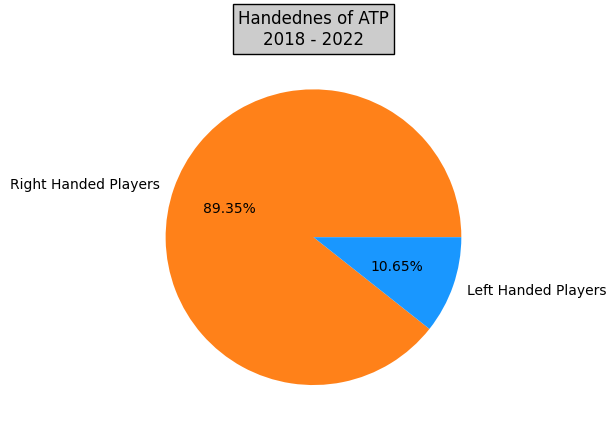

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [num_r, num_l]
labels = ['Right Handed Players', 'Left Handed Players']

#define Seaborn color palette to use
colors = ['#FF8119', '#1997FF']

right_w_c = '#FF8119'
left_w_c = '#1997FF'

plt.style.context = 'poster'

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Handednes of ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':4})

plt.show()

In [ ]:
atp.columns

Index(['year', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'],
      dtype='object')

In [ ]:
#@title Separating Into Rank

# atp_final = atp_final.reset_index(drop = True)
num1_condition_w = atp['winner_rank'] == 1
num1_condition_l = atp['loser_rank'] == 1

atp_top1_w = atp[num1_condition_w]
atp_top1_w = atp_top1_w.reset_index(drop = True)

atp_top1_l = atp[num1_condition_l]
atp_top1_l = atp_top1_l.reset_index(drop = True)


top10_condition_w = atp['winner_rank'] <= 10
top10_condition_l = atp['loser_rank'] <= 10

atp_top10_w = atp[top10_condition_w]
atp_top10_w = atp_top10_w.reset_index(drop = True)

atp_top10_l = atp[top10_condition_l]
atp_top10_l = atp_top10_l.reset_index(drop = True)


top50_condition_w = atp['winner_rank'] <= 50
top50_condition_l = atp['loser_rank'] <= 50

atp_top50_w = atp[top50_condition_w]
atp_top50_w = atp_top50_w.reset_index(drop = True)

atp_top50_l = atp[top50_condition_l]
atp_top50_l = atp_top50_l.reset_index(drop = True)

In [ ]:
#@title NUM 1
cnt = 0

# list to hold visited values
visited = []
lefty = []
righty = []

# loop for counting the unique
# values in height
for i in range(0, len(atp_top1_w['winner_name'])):

    if atp_top1_w['winner_name'][i] not in visited:

        visited.append(atp_top1_w['winner_name'][i])

        if atp_top1_w['winner_hand'][i] == 'L' :
          lefty.append(atp_top1_w['winner_name'][i])
        else :
          righty.append(atp_top1_w['winner_name'][i])

        cnt += 1

# finds anyone who only lost a match
for i in range(0, len(atp_top1_l['loser_name'])):

    if atp_top1_l['loser_name'][i] not in visited:

        visited.append(atp_top1_l['loser_name'][i])

        if atp_top1_l['loser_hand'][i] == 'L' :
          lefty.append(atp_top1_l['loser_name'][i])
        else :
          righty.append(atp_top1_l['loser_name'][i])

        cnt += 1

print("TOP 1 PLAYERS \nNo.of.unique values :",
      cnt)

print("unique values :",
      visited)

print("lefties :", lefty, '\n', len(lefty))

leftyno1 = len(lefty)

print("righties :", righty, '\n', len(righty))

rightyno1 = len(righty)

TOP 1 PLAYERS 
No.of.unique values : 5
unique values : ['Novak Djokovic', 'Daniil Medvedev', 'Carlos Alcaraz', 'Rafael Nadal', 'Roger Federer']
lefties : ['Rafael Nadal'] 
 1
righties : ['Novak Djokovic', 'Daniil Medvedev', 'Carlos Alcaraz', 'Roger Federer'] 
 4


In [ ]:
#@title TOP 10
cnt = 0

# list to hold visited values
visited = []
lefty = []
righty = []

# loop for counting the unique
# values in height
for i in range(0, len(atp_top10_w['winner_name'])):

    if atp_top10_w['winner_name'][i] not in visited:

        visited.append(atp_top10_w['winner_name'][i])

        if atp_top10_w['winner_hand'][i] == 'L' :
          lefty.append(atp_top10_w['winner_name'][i])
        else :
          righty.append(atp_top10_w['winner_name'][i])

        cnt += 1

# finds anyone who only lost a match
for i in range(0, len(atp_top10_l['loser_name'])):

    if atp_top10_l['loser_name'][i] not in visited:

        visited.append(atp_top10_l['loser_name'][i])

        if atp_top10_l['loser_hand'][i] == 'L' :
          lefty.append(atp_top10_l['loser_name'][i])
        else :
          righty.append(atp_top10_l['loser_name'][i])

        cnt += 1

print("TOP 10 PLAYERS \nNo.of.unique values :",
      cnt)

print("unique values :",
      visited)

print("lefties :", lefty, '\n', len(lefty))

leftyno10 = len(lefty)

print("righties :", righty, '\n', len(righty))

rightyno10 = len(righty)

TOP 10 PLAYERS 
No.of.unique values : 32
unique values : ['Daniil Medvedev', 'Casper Ruud', 'Jannik Sinner', 'Matteo Berrettini', 'Alexander Zverev', 'Hubert Hurkacz', 'Stefanos Tsitsipas', 'Rafael Nadal', 'Andrey Rublev', 'Felix Auger Aliassime', 'Novak Djokovic', 'Cameron Norrie', 'Carlos Alcaraz', 'Taylor Fritz', 'Diego Schwartzman', 'Dominic Thiem', 'Roger Federer', 'Roberto Bautista Agut', 'Denis Shapovalov', 'Gael Monfils', 'David Goffin', 'Kei Nishikori', 'Kevin Anderson', 'Marin Cilic', 'John Isner', 'Juan Martin del Potro', 'Karen Khachanov', 'Fabio Fognini', 'Grigor Dimitrov', 'Stan Wawrinka', 'Jack Sock', 'Pablo Carreno Busta']
lefties : ['Rafael Nadal', 'Cameron Norrie', 'Denis Shapovalov'] 
 3
righties : ['Daniil Medvedev', 'Casper Ruud', 'Jannik Sinner', 'Matteo Berrettini', 'Alexander Zverev', 'Hubert Hurkacz', 'Stefanos Tsitsipas', 'Andrey Rublev', 'Felix Auger Aliassime', 'Novak Djokovic', 'Carlos Alcaraz', 'Taylor Fritz', 'Diego Schwartzman', 'Dominic Thiem', 'Roger F

In [ ]:
#@title TOP 50
cnt = 0

# list to hold visited values
visited = []
lefty = []
righty = []

# loop for counting the unique
# values in height
for i in range(0, len(atp_top50_w['winner_name'])):

    if atp_top50_w['winner_name'][i] not in visited:

        visited.append(atp_top50_w['winner_name'][i])

        if atp_top50_w['winner_hand'][i] == 'L' :
          lefty.append(atp_top50_w['winner_name'][i])
        else :
          righty.append(atp_top50_w['winner_name'][i])

        cnt += 1

# finds anyone who only lost a match
for i in range(0, len(atp_top50_l['loser_name'])):

    if atp_top50_l['loser_name'][i] not in visited:

        visited.append(atp_top50_l['loser_name'][i])

        if atp_top50_l['loser_hand'][i] == 'L' :
          lefty.append(atp_top50_l['loser_name'][i])
        else :
          righty.append(atp_top50_l['loser_name'][i])

        cnt += 1

print("TOP 50 PLAYERS \nNo.of.unique values :",
      cnt)

print("unique values :",
      visited)

print("lefties :", lefty, '\n', len(lefty))

leftyno50 = len(lefty)

print("righties :", righty, '\n', len(righty))

rightyno50 = len(righty)

TOP 50 PLAYERS 
No.of.unique values : 124
unique values : ['Felix Auger Aliassime', 'Denis Shapovalov', 'Roberto Bautista Agut', 'Pablo Carreno Busta', 'Daniil Medvedev', 'Casper Ruud', 'Filip Krajinovic', 'Cristian Garin', 'Jannik Sinner', 'Ugo Humbert', 'Matteo Berrettini', 'Alex De Minaur', 'Alexander Zverev', 'Daniel Evans', 'Taylor Fritz', 'John Isner', 'Hubert Hurkacz', 'Diego Schwartzman', 'Federico Delbonis', 'Stefanos Tsitsipas', 'Gael Monfils', 'Karen Khachanov', 'Marin Cilic', 'Tommy Paul', 'Rafael Nadal', 'Grigor Dimitrov', 'Marton Fucsovics', 'Aslan Karatsev', 'Reilly Opelka', 'Lorenzo Sonego', 'David Goffin', 'Dusan Lajovic', 'Fabio Fognini', 'Alexander Bublik', 'Sebastian Korda', 'Carlos Alcaraz', 'Frances Tiafoe', 'Andrey Rublev', 'Arthur Rinderknech', 'Alejandro Davidovich Fokina', 'Albert Ramos', 'Cameron Norrie', 'Ilya Ivashka', 'Mackenzie Mcdonald', 'Nikoloz Basilashvili', 'Botic Van De Zandschulp', 'Novak Djokovic', 'Jenson Brooksby', 'Lloyd Harris', 'Pedro Martine

([<matplotlib.axis.XTick at 0x7f34c27391e0>,
 [Text(0.2, 0, 'Right Handed No. 1'),
  Text(0.7, 0, 'Left Handed No. 1'),
  Text(1.7, 0, 'Right Handed Top 10'),
  Text(2.2, 0, 'Left Handed Top 10'),
  Text(3.2, 0, 'Right Handed Top 50'),
  Text(3.7, 0, 'Left Handed Top 50')])

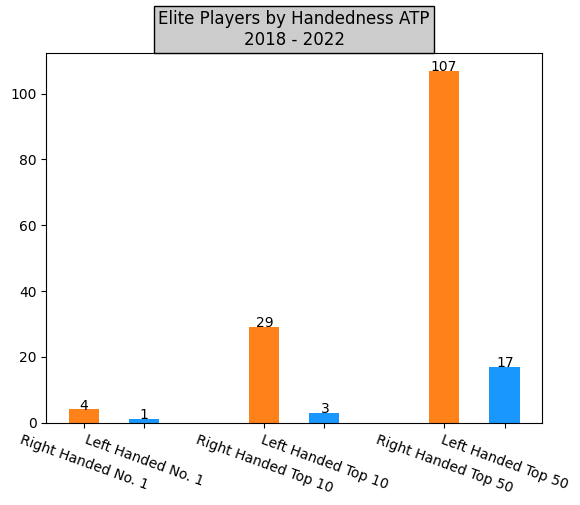

In [ ]:
# graph showing number of unique players and hand per top1, top10, top50
height = [rightyno1, leftyno1, rightyno10, leftyno10, rightyno50, leftyno50]
bars = ['Right Handed No. 1', 'Left Handed No. 1',
        'Right Handed Top 10', 'Left Handed Top 10',
        'Right Handed Top 50', 'Left Handed Top 50']
x_pos = .2, .7, 1.7, 2.2, 3.2, 3.7

plt.bar(x_pos, height, width = .25, color = [right_w_c, left_w_c, right_w_c, left_w_c, right_w_c, left_w_c])

plt.title("Elite Players by Handedness ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':3})

plt.annotate('4', xy = (.15,4), xytext = (.16,4))
plt.annotate('1', xy = (.67,1), xytext = (.66,1))
plt.annotate('29', xy = (1.62,29), xytext = (1.63,29))
plt.annotate('3', xy = (2.12,3), xytext = (2.17,3))
plt.annotate('107', xy = (3.12,107), xytext = (3.08,107))
plt.annotate('17', xy = (3.62,17), xytext = (3.63,17))

plt.xticks(x_pos, bars, rotation = -20)

In [ ]:
#@title Right Handed Wins/Losses vs. Left Handed Wins/Losses
atp


right_w = 0
right_l = 0
left_w = 0
left_l = 0

# loop for counting the unique
# values in height
for i in range(0, len(atp['winner_hand'])):

    if atp['winner_hand'][i] == 'L':
        left_w += 1
    elif atp['winner_hand'][i] == 'R':
        right_w +=1

# finds anyone who only lost a match
for i in range(0, len(atp['loser_hand'])):

    if atp['loser_hand'][i] == 'L':
        left_l += 1
    elif atp['loser_hand'][i] == 'R':
        right_l +=1


print("right wins vs. losses :",
      right_w, "vs.", right_l)

print("left wins vs. losses:",
      left_w, "vs.", left_l)

right wins vs. losses : 11031 vs. 10819
left wins vs. losses: 1697 vs. 1832


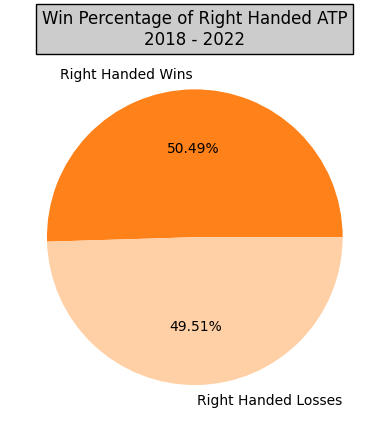

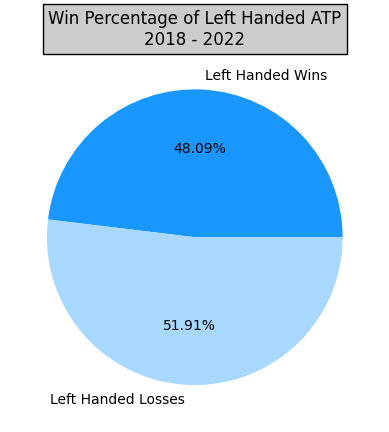

In [ ]:
#@title Win% ATP
#define data
data = [right_w, right_l]
labels = ['Right Handed Wins', 'Right Handed Losses']

#define Seaborn color palette to use

colors = [right_w_c, right_l_c]

style = 'poster'

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Win Percentage of Right Handed ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':4})

plt.show()


#define data
data = [left_w, left_l]
labels = ['Left Handed Wins', 'Left Handed Losses']

#define Seaborn color palette to use


colors = [left_w_c, left_l_c]

style = 'poster'

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Win Percentage of Left Handed ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':4})

plt.show()

FINALS OF TOURNAMENTS

In [ ]:
condition_final = atp['round'] == 'F'
atp_final = atp[condition_final]
atp_final = atp_final.reset_index(drop = True)
print(len(atp_final))

305


In [ ]:
atp_final


cnt = 0

# list to hold visited values
visited = []
lefty = []
righty = []

# loop for counting the unique
# values in height
for i in range(0, len(atp_final['winner_name'])):

    if atp_final['winner_name'][i] not in visited:

        visited.append(atp_final['winner_name'][i])

        if atp_final['winner_hand'][i] == 'L' :
          lefty.append(atp_final['winner_name'][i])
        else :
          righty.append(atp_final['winner_name'][i])

        cnt += 1

# finds anyone who only lost a match
for i in range(0, len(atp_final['loser_name'])):

    if atp_final['loser_name'][i] not in visited:

        visited.append(atp_final['loser_name'][i])

        if atp_final['loser_hand'][i] == 'L' :
          lefty.append(atp_final['loser_name'][i])
        else :
          righty.append(atp_final['loser_name'][i])

        cnt += 1

print("No.of.unique values :",
      cnt)

print("unique values :",
      visited)

print("lefties :", lefty, '\n', len(lefty))

print("righties :", righty, '\n', len(righty))

data = {'name': [visited],
        }
players_df = pd.DataFrame(data)

No.of.unique values : 147
unique values : ['Felix Auger Aliassime', 'Denis Shapovalov', 'Gael Monfils', 'Rafael Nadal', 'Thanasi Kokkinakis', 'Aslan Karatsev', 'Albert Ramos', 'Alexander Bublik', 'Joao Sousa', 'Casper Ruud', 'Reilly Opelka', 'Cameron Norrie', 'Roberto Bautista Agut', 'Carlos Alcaraz', 'Andrey Rublev', 'Pedro Martinez', 'Taylor Fritz', 'David Goffin', 'Stefanos Tsitsipas', 'Sebastian Baez', 'Holger Rune', 'Novak Djokovic', 'Tim Van Rijthoven', 'Matteo Berrettini', 'Hubert Hurkacz', 'Francisco Cerundolo', 'Maxime Cressy', 'Lorenzo Musetti', 'Alex De Minaur', 'Jannik Sinner', 'Daniil Medvedev', 'Nick Kyrgios', 'Pablo Carreno Busta', 'Borna Coric', 'Adrian Mannarino', 'Brandon Nakashima', 'Lorenzo Sonego', 'Yoshihito Nishioka', 'Marc Andrea Huesler', 'Alexander Zverev', 'Nikoloz Basilashvili', 'Kevin Anderson', 'Marin Cilic', 'Tommy Paul', 'Ugo Humbert', 'Diego Schwartzman', 'John Isner', 'Ilya Ivashka', 'Cristian Garin', 'Juan Manuel Cerundolo', 'Soon Woo Kwon', 'Daniel E

In [ ]:
# checking number of finals wins per hand

atp_final

right_fw = 0
left_fw = 0

right_fl = 0
left_fl = 0

leftvleft = 0

for i in range (0,len(atp_final['winner_name'])):

  if(atp_final['winner_hand'][i] == 'R'):
    right_fw += 1
  elif(atp_final['winner_hand'][i] == 'L'):
    left_fw +=1

for i in range (0,len(atp_final['loser_name'])):

  if(atp_final['loser_hand'][i] == 'R'):
    right_fl += 1
  elif(atp_final['loser_hand'][i] == 'L'):
    left_fl +=1

for i in range (0,len(atp_final['loser_name'])):
    if((atp_final['winner_hand'][i] =='L') and (atp_final['loser_hand'][i] =='L')) :
      leftvleft +=1

print('righty wins :', right_fw)
print('lefty wins :', left_fw)

print('righty losses :', right_fl)
print('lefty losses :', left_fl)

right_fa = right_fl+right_fw
left_fa = left_fw+ left_fl

print('righty appearances :', right_fa)
print('lefty appearances :', left_fa)
print('leftvleft :', leftvleft)

righty wins : 265
lefty wins : 40
righty losses : 267
lefty losses : 38
righty appearances : 532
lefty appearances : 78
leftvleft : 7


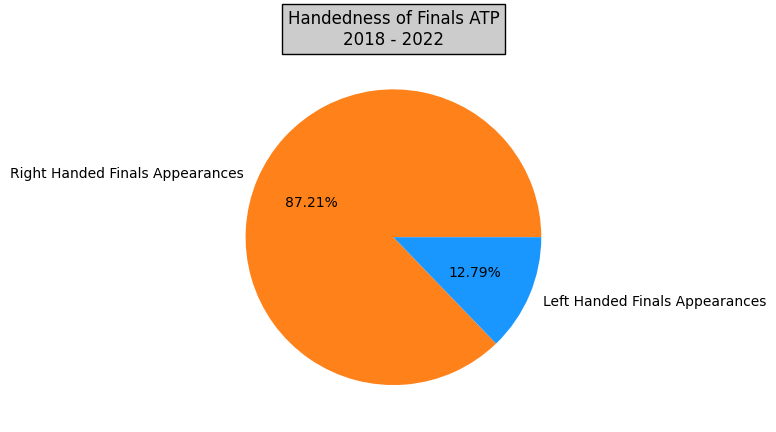

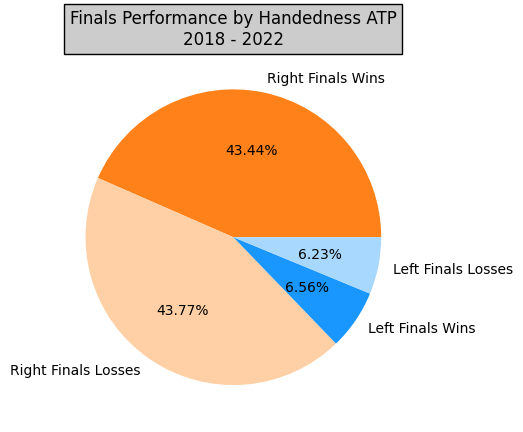

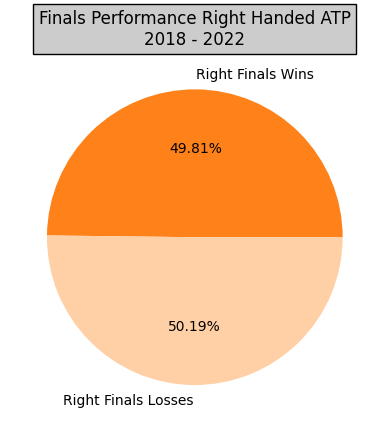

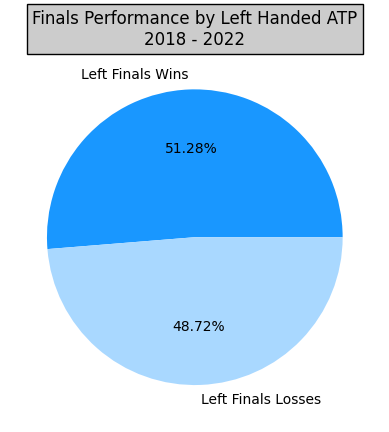

In [ ]:
# OVERALL HANDEDNESS OF THE FINAL
data = [right_fa, left_fa]
labels = ['Right Handed Finals Appearances', 'Left Handed Finals Appearances']

#define Seaborn color palette to use
colors = ['#FF8119', '#1997FF']

context = 'poster'

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Handedness of Finals ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':4})

plt.show()


# HOW THEY DID BOTH HANDEDNESS
data = [right_fw, right_fl, left_fw, left_fl]
labels = ['Right Finals Wins', 'Right Finals Losses', 'Left Finals Wins', 'Left Finals Losses']

#define Seaborn color palette to use
colors = [right_w_c, right_l_c, left_w_c, left_l_c]

context = 'poster'

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Finals Performance by Handedness ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':4})

plt.show()


# HOW RIGHTIES DID OVERALL
data = [right_fw, right_fl]
labels = ['Right Finals Wins', 'Right Finals Losses']

#define Seaborn color palette to use
colors = [right_w_c, right_l_c]

context = 'poster'

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Finals Performance Right Handed ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':4})

plt.show()


#HOW LEFTIES DID OVERALL
data = [left_fw, left_fl]
labels = ['Left Finals Wins', 'Left Finals Losses']

#define Seaborn color palette to use
colors = [left_w_c, left_l_c]

context = 'poster'

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Finals Performance by Left Handed ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':4})

plt.show()

([<matplotlib.axis.XTick at 0x7f34c726d750>,
 [Text(0.2, 0, 'Right Handed Finals Win'),
  Text(0.7, 0, 'Right Handed Finals Loss'),
  Text(1.2, 0, 'Left Handed Finals Win'),
  Text(1.7, 0, 'Left Handed Finals Loss')])

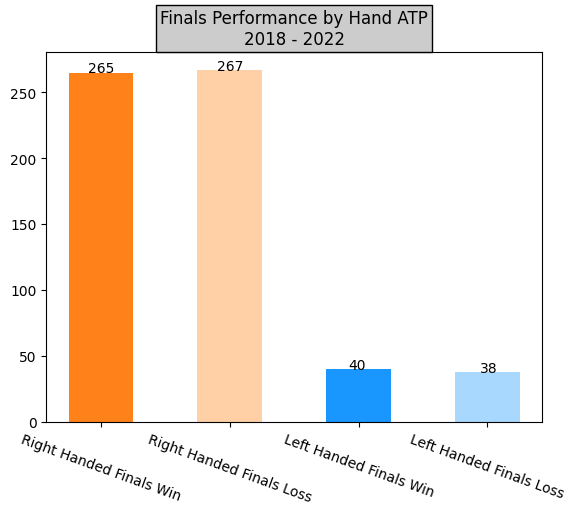

In [ ]:
height = [right_fw, right_fl, left_fw, left_fl]
bars = ['Right Handed Finals Win', 'Right Handed Finals Loss', 'Left Handed Finals Win', 'Left Handed Finals Loss']
x_pos = .2, .7, 1.2, 1.7

plt.bar(x_pos, height, width = .25, color = [right_w_c, right_l_c, left_w_c, left_l_c])

plt.title("Finals Performance by Hand ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':3})

plt.annotate('265', xy = (.15,265), xytext = (.15,265))
plt.annotate('267', xy = (.65,267), xytext = (.65,267))
plt.annotate('40', xy = (1.16,40), xytext = (1.16,40))
plt.annotate('38', xy = (1.67,38), xytext = (1.67,38))

plt.xticks(x_pos, bars, rotation = -20)

LENGTH OF MATCHES

In [ ]:
atp.columns

Index(['year', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'],
      dtype='object')

In [ ]:
condition_rw = atp['winner_hand'] == 'R'
condition_lw = atp['winner_hand'] == 'L'

rv = atp[condition_rw]
lv = atp[condition_lw]

In [ ]:
condition_rvr = rv['loser_hand'] == 'R'
condition_rvl = rv['loser_hand'] == 'L'

rvr = rv[condition_rvr]
rvl = rv[condition_rvl]


condition_lvr = lv['loser_hand'] == 'R'
condition_lvl = lv['loser_hand'] == 'L'

lvr = lv[condition_lvr]
lvl = lv[condition_lvl]

print(len(rvr),len(rvl),len(lvr),len(lvl))

9327 1576 1425 250


In [ ]:
print(lvl['winner_hand'].unique(),
      lvl['loser_hand'].unique())

['L'] ['L']


TIME OF MATCHES BY HANDEDNESS

In [ ]:
rvr['minutes']

0        129.0
2        164.0
3         53.0
4         68.0
6        100.0
         ...  
12810      NaN
12811      NaN
12812      NaN
12813      NaN
12814      NaN
Name: minutes, Length: 9327, dtype: float64

In [ ]:
rvr_time = rvr['minutes'].describe()
lvr_time = lvr['minutes'].describe()
rvl_time = rvl['minutes'].describe()
lvl_time = lvl['minutes'].describe()
rvr_time, rvl_time, lvr_time, lvl_time

(count    8905.000000
 mean      113.201348
 std        42.423905
 min         0.000000
 25%        82.000000
 50%       106.000000
 75%       138.000000
 max       396.000000
 Name: minutes, dtype: float64,
 count    1526.000000
 mean      112.560288
 std        43.222474
 min         0.000000
 25%        81.000000
 50%       104.000000
 75%       136.000000
 max       365.000000
 Name: minutes, dtype: float64,
 count    1394.000000
 mean      117.102582
 std        43.142648
 min         0.000000
 25%        84.000000
 50%       110.000000
 75%       141.000000
 max       324.000000
 Name: minutes, dtype: float64,
 count    245.000000
 mean     113.387755
 std       38.495058
 min       46.000000
 25%       83.000000
 50%      106.000000
 75%      136.000000
 max      262.000000
 Name: minutes, dtype: float64)

In [ ]:
rvr_bo3_condition = rvr['best_of'] == 3
rvr_bo5_condition = rvr['best_of'] == 5

rvr3 = rvr[rvr_bo3_condition]
rvr3 = rvr3.reset_index(drop = True)
rvr5 = rvr[rvr_bo5_condition]
rvr5 = rvr5.reset_index(drop = True)


rvl_bo3_condition = rvl['best_of'] == 3
rvl_bo5_condition = rvl['best_of'] == 5

rvl3 = rvl[rvl_bo3_condition]
rvl3 = rvl3.reset_index(drop = True)
rvl5 = rvl[rvl_bo5_condition]
rvl5 = rvl5.reset_index(drop = True)


lvr_bo3_condition = lvr['best_of'] == 3
lvr_bo5_condition = lvr['best_of'] == 5

lvr3 = lvr[lvr_bo3_condition]
lvr3 = lvr3.reset_index(drop = True)
lvr5 = lvr[lvr_bo5_condition]
lvr5 = lvr5.reset_index(drop = True)


lvl_bo3_condition = lvl['best_of'] == 3
lvl_bo5_condition = lvl['best_of'] == 5

lvl3 = lvl[lvl_bo3_condition]
lvl3 = lvl3.reset_index(drop = True)
lvl5 = lvl[lvl_bo5_condition]
lvl5 = lvl5.reset_index(drop = True)

In [ ]:
#@title Dropping all but score
rvr3b = rvr3.drop(['year', 'tourney_name','surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age','best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'], axis = 1)
rvr5b = rvr5.drop(['year', 'tourney_name','surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age','best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'], axis = 1)

rvl3b = rvl3.drop(['year', 'tourney_name','surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age','best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'], axis = 1)
rvl5b = rvl5.drop(['year', 'tourney_name','surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age','best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'], axis = 1)

lvr3b = lvr3.drop(['year', 'tourney_name','surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age','best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'], axis = 1)
lvr5b = lvr5.drop(['year', 'tourney_name','surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age','best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'], axis = 1)

lvl3b = lvl3.drop(['year', 'tourney_name','surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age','best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'], axis = 1)
lvl5b = lvl5.drop(['year', 'tourney_name','surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_seed', 'winner_name',
       'winner_hand', 'winner_age', 'loser_seed', 'loser_name', 'loser_hand',
       'loser_age','best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank'], axis = 1)

In [ ]:
# rvr3b, rvr5b, rvl3b, rvl5b, lvr3b, lvr5b, lvl3b, lvl5b
rvr3b['num_sets'] = 1+ rvr3b['score'].str.count(' ')
rvr5b['num_sets'] = 1+ rvr5b['score'].str.count(' ')

rvl3b['num_sets'] = 1+ rvl3b['score'].str.count(' ')
rvl5b['num_sets'] = 1+ rvl5b['score'].str.count(' ')

lvr3b['num_sets'] = 1+ lvr3b['score'].str.count(' ')
lvr5b['num_sets'] = 1+ lvr5b['score'].str.count(' ')

lvl3b['num_sets'] = 1+ lvl3b['score'].str.count(' ')
lvl5b['num_sets'] = 1+ lvl5b['score'].str.count(' ')

print(#'rvr3\n', rvr3b['num_games'].value_counts(),
'rvr5\n', rvr5b['num_sets'].value_counts(),
# 'rvl3\n', rvl3b['num_games'].value_counts(),
'rvl5\n', rvl5b['num_sets'].value_counts(),
# 'lvr3\n', lvr3b['num_games'].value_counts(),
'lvr5\n', lvr5b['num_sets'].value_counts(),
# 'lvl3\n', lvl3b['num_games'].value_counts(),
'lvl5\n', lvl5b['num_sets'].value_counts(),)

# ['num_games'] == 1
# ['num_games'] == 2
# ['num_games'] == 3
# ['num_games'] == 4
# ['num_games'] == 5

rvr5
 3    824
4    612
5    369
1      7
6      6
2      3
Name: num_sets, dtype: int64 rvl5
 3    158
4    111
5     52
6      2
1      1
Name: num_sets, dtype: int64 lvr5
 3    146
4     88
5     58
1      2
6      1
Name: num_sets, dtype: int64 lvl5
 3    22
4     9
5     5
Name: num_sets, dtype: int64


In [ ]:
rvr3b

,score,num_sets
0,7-6(3) 6-3,2
1,7-6(6) 2-6 7-6(5),3
2,6-2 6-1,2
3,6-4 6-0,2
4,6-3 7-5,2
...,...,...
7501,6-4 4-6 [11-9],3
7502,3-6 7-6(6) [10-7],3
7503,6-3 6-2,2
7504,7-6(5) 5-7 [10-6],3


<ipython-input-38-a2b1aaefbed2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)
<ipython-input-38-a2b1aaefbed2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)
<ipython-input-38-a2b1aaefbed2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)
<ipython-input-38-a2b1aaefbed2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)
<ipython-input-3

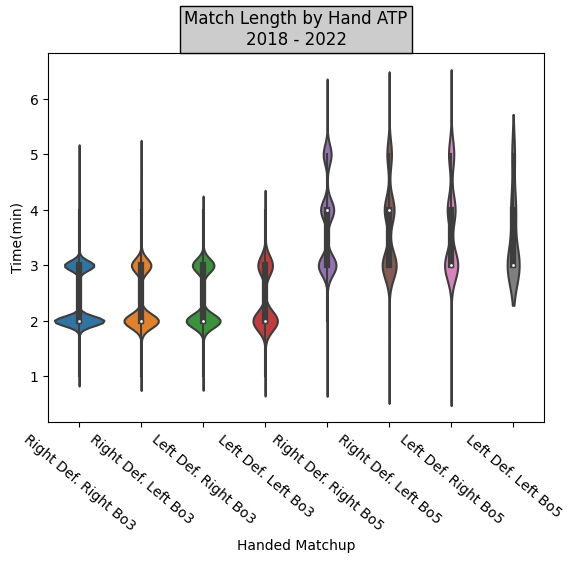

In [ ]:
a = pd.DataFrame({ 'Handed Matchup' : np.repeat('Right Def. Right Bo3',7506), 'Time(min)': rvr3b['num_sets'] })
e = pd.DataFrame({ 'Handed Matchup' : np.repeat('Right Def. Right Bo5',1821), 'Time(min)': rvr5b['num_sets'] })

b = pd.DataFrame({ 'Handed Matchup' : np.repeat('Right Def. Left Bo3',1252), 'Time(min)': rvl3b['num_sets'] })
f = pd.DataFrame({ 'Handed Matchup' : np.repeat('Right Def. Left Bo5',324), 'Time(min)': rvl5b['num_sets'] })

c = pd.DataFrame({ 'Handed Matchup' : np.repeat('Left Def. Right Bo3',1130), 'Time(min)': lvr3b['num_sets'] })
g = pd.DataFrame({ 'Handed Matchup' : np.repeat('Left Def. Right Bo5',295), 'Time(min)': lvr5b['num_sets'] })

d = pd.DataFrame({ 'Handed Matchup' : np.repeat('Left Def. Left Bo3',214), 'Time(min)': lvl3b['num_sets'] })
h = pd.DataFrame({ 'Handed Matchup' : np.repeat('Left Def. Left Bo5',36), 'Time(min)': lvl5b['num_sets'] })

df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)

ax = sns.violinplot(x='Handed Matchup', y='Time(min)', data=df)
# # add stripplot
# ax = sns.stripplot(x='Handed Matchup', y='Time(min)', data=df, color="orange", jitter=0.2, size=2)

# plot violin chart
# sns.violinplot( x='Handed Matchup', y='Time(min)', data=df)

# add title
plt.title("Match Length by Hand ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':3})


plt.xticks(rotation = -40)

# show the graph
plt.show()

In [ ]:
rvr3b

,score,num_sets
0,7-6(3) 6-3,2
1,7-6(6) 2-6 7-6(5),3
2,6-2 6-1,2
3,6-4 6-0,2
4,6-3 7-5,2
...,...,...
7501,6-4 4-6 [11-9],3
7502,3-6 7-6(6) [10-7],3
7503,6-3 6-2,2
7504,7-6(5) 5-7 [10-6],3


In [ ]:
# actualrange_condition = rvr['minutes'] < 288
# actualrange_condition = rvr['minutes'] > 0
# rvr = rvr[actualrange_condition]

actualrange_condition = rvr3['minutes'] > 0
rvr3m = rvr3[actualrange_condition]

actualrange_condition = rvr5['minutes'] > 0
rvr5m = rvr5[actualrange_condition]

actualrange_condition = rvl3['minutes'] > 0
rvl3m = rvl3[actualrange_condition]

actualrange_condition = rvl5['minutes'] > 0
rvl5m = rvl5[actualrange_condition]

actualrange_condition = lvr3['minutes'] > 0
lvr3m = lvr3[actualrange_condition]

actualrange_condition = lvr5['minutes'] > 0
lvr5m = lvr5[actualrange_condition]

actualrange_condition = lvl3['minutes'] > 0
lvl3m = lvl3[actualrange_condition]

actualrange_condition = lvl5['minutes'] > 0
lvl5m = lvl5[actualrange_condition]


In [ ]:
print(rvr3m['minutes'].describe()
,rvl3m['minutes'].describe()
,lvr3m['minutes'].describe()
,lvl3m['minutes'].describe())

count    7163.000000
mean      103.171855
std        32.678679
min         7.000000
25%        78.000000
50%        97.000000
75%       125.000000
max       356.000000
Name: minutes, dtype: float64 count    1211.000000
mean      101.872832
std        31.984325
min        16.000000
25%        77.500000
50%        96.000000
75%       124.000000
max       216.000000
Name: minutes, dtype: float64 count    1105.000000
mean      105.904977
std        33.441072
min        23.000000
25%        79.000000
50%       101.000000
75%       130.000000
max       289.000000
Name: minutes, dtype: float64 count    210.000000
mean     107.109524
std       33.857320
min       46.000000
25%       81.000000
50%      101.000000
75%      127.750000
max      219.000000
Name: minutes, dtype: float64


In [ ]:
print(rvr5m['minutes'].describe()
,rvl5m['minutes'].describe()
,lvr5m['minutes'].describe()
,lvl5m['minutes'].describe())

count    1715.000000
mean      156.873469
std        48.546995
min        15.000000
25%       120.000000
50%       150.000000
75%       189.000000
max       396.000000
Name: minutes, dtype: float64 count    310.000000
mean     156.125806
std       51.549269
min       48.000000
25%      114.000000
50%      145.500000
75%      193.000000
max      365.000000
Name: minutes, dtype: float64 count    287.000000
mean     161.031359
std       47.244074
min       41.000000
25%      125.000000
50%      151.000000
75%      196.000000
max      324.000000
Name: minutes, dtype: float64 count     35.000000
mean     151.057143
std       43.404352
min       86.000000
25%      121.000000
50%      149.000000
75%      179.500000
max      262.000000
Name: minutes, dtype: float64


<ipython-input-43-0b18151cb892>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)
<ipython-input-43-0b18151cb892>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)
<ipython-input-43-0b18151cb892>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)
<ipython-input-43-0b18151cb892>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)
<ipython-input-4

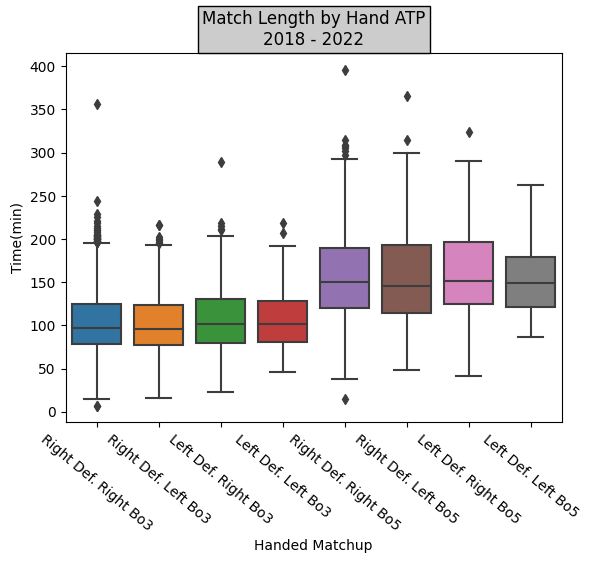

In [ ]:
#  Dataset:
a = pd.DataFrame({ 'Handed Matchup' : np.repeat('Right Def. Right Bo3',7163), 'Time(min)': rvr3m['minutes'] })
e = pd.DataFrame({ 'Handed Matchup' : np.repeat('Right Def. Right Bo5',1715), 'Time(min)': rvr5m['minutes'] })

b = pd.DataFrame({ 'Handed Matchup' : np.repeat('Right Def. Left Bo3',1211), 'Time(min)': rvl3m['minutes'] })
f = pd.DataFrame({ 'Handed Matchup' : np.repeat('Right Def. Left Bo5',310), 'Time(min)': rvl5m['minutes'] })

c = pd.DataFrame({ 'Handed Matchup' : np.repeat('Left Def. Right Bo3',1105), 'Time(min)': lvr3m['minutes'] })
g = pd.DataFrame({ 'Handed Matchup' : np.repeat('Left Def. Right Bo5',287), 'Time(min)': lvr5m['minutes'] })

d = pd.DataFrame({ 'Handed Matchup' : np.repeat('Left Def. Left Bo3',210), 'Time(min)': lvl3m['minutes'] })
h = pd.DataFrame({ 'Handed Matchup' : np.repeat('Left Def. Left Bo5',35), 'Time(min)': lvl5m['minutes'] })

df=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h)

ax = sns.boxplot(x='Handed Matchup', y='Time(min)', data=df)
# # add stripplot
# ax = sns.stripplot(x='Handed Matchup', y='Time(min)', data=df, color="orange", jitter=0.2, size=2)

# plot violin chart
# sns.violinplot( x='Handed Matchup', y='Time(min)', data=df)

# add title
plt.title("Match Length by Hand ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':3})


plt.xticks(rotation = -40)

# show the graph
plt.show()

SURFACE PERFORMANCE

In [ ]:
lvr['surface'].unique()

array(['Hard', 'Clay', 'Grass'], dtype=object)

In [ ]:
condition_h_rvr = rvr['surface'] == 'Hard'
condition_c_rvr = rvr['surface'] == 'Clay'
condition_g_rvr = rvr['surface'] == 'Grass'

rvr_h = rvr[condition_h_rvr]
rvr_c = rvr[condition_c_rvr]
rvr_g = rvr[condition_g_rvr]


condition_h_rvl = rvl['surface'] == 'Hard'
condition_c_rvl = rvl['surface'] == 'Clay'
condition_g_rvl = rvl['surface'] == 'Grass'

rvl_h = rvl[condition_h_rvl]
rvl_c = rvl[condition_c_rvl]
rvl_g = rvl[condition_g_rvl]


condition_h_lvr = lvr['surface'] == 'Hard'
condition_c_lvr = lvr['surface'] == 'Clay'
condition_g_lvr = lvr['surface'] == 'Grass'

lvr_h = lvr[condition_h_lvr]
lvr_c = lvr[condition_c_lvr]
lvr_g = lvr[condition_g_lvr]


condition_h_lvl = lvl['surface'] == 'Hard'
condition_c_lvl = lvl['surface'] == 'Clay'
condition_g_lvl = lvl['surface'] == 'Grass'

lvl_h = lvl[condition_h_lvl]
lvl_c = lvl[condition_c_lvl]
lvl_g = lvl[condition_g_lvl]

num_rvr_h = len(rvr_h)
num_rvr_c = len(rvr_c)
num_rvr_g = len(rvr_g)

num_rvl_h = len(rvl_h)
num_rvl_c = len(rvl_c)
num_rvl_g = len(rvl_g)

num_lvr_h = len(lvr_h)
num_lvr_c = len(lvr_c)
num_lvr_g = len(lvr_g)

num_lvl_h = len(lvl_h)
num_lvl_c = len(lvl_c)
num_lvl_g = len(lvl_g)

In [ ]:
print(
  'rvr', len(rvr_h),len(rvr_c),len(rvr_g),'\n',
  'rvl', len(rvl_h),len(rvl_c),len(rvl_g),'\n',
  'lvr', len(lvr_h),len(lvr_c),len(lvr_g),'\n',
  'lvl', len(lvl_h),len(lvl_c),len(lvl_g))

rvr 5805 2615 907 
 rvl 913 473 190 
 lvr 767 498 160 
 lvl 102 127 21


([<matplotlib.axis.XTick at 0x7f34c4b683d0>,
 [Text(0.2, 0, 'Right Win Hardcourt'),
  Text(0.7, 0, 'Left Win Hardcourt'),
  Text(1.7, 0, 'Right Win Claycourt'),
  Text(2.2, 0, 'Left Win Claycourt'),
  Text(3.2, 0, 'Right Win Grasscourt'),
  Text(3.7, 0, 'Left Win Grasscourt')])

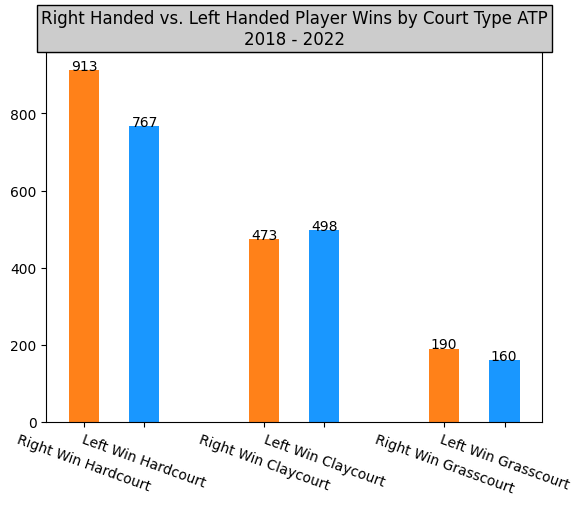

In [ ]:
height = [num_rvl_h, num_lvr_h, num_rvl_c, num_lvr_c, num_rvl_g, num_lvr_g]
bars = ['Right Win Hardcourt', 'Left Win Hardcourt',
        'Right Win Claycourt', 'Left Win Claycourt',
        'Right Win Grasscourt', 'Left Win Grasscourt']
x_pos = .2, .7, 1.7, 2.2, 3.2, 3.7

plt.bar(x_pos, height, width = .25, color = [right_w_c, left_w_c, right_w_c, left_w_c, right_w_c, left_w_c])

plt.title("Right Handed vs. Left Handed Player Wins by Court Type ATP\n" + "2018 - 2022", bbox={'facecolor':'0.8', 'pad':3})

plt.annotate('913', xy = (.1,913), xytext = (.095,913))
plt.annotate('767', xy = (.63,767), xytext = (.6,767))
plt.annotate('473', xy = (1.62,473), xytext = (1.595,473))
plt.annotate('498', xy = (2.12,498), xytext = (2.09,498))
plt.annotate('190', xy = (3.12,190), xytext = (3.08,190))
plt.annotate('160', xy = (3.62,160), xytext = (3.58,160))

plt.xticks(x_pos, bars, rotation = -20)